## **Trabajo Final - Análisis Exploratorio de Datos**
### Luis Felipe Montenegro Fuentes

### **Resultados Pruebas Saber 11**
##### En Colombia, las pruebas saber 11 corresponden a un cuestionario diseñado para evaluar las habilidades y conocimientos académicos que han adquirido los estudiantes  en su paso por el bachillerato. En estas, se evalúan áreas del conocimiento como matemáticas, lectura, ciencias naturales, ciencias sociales, inglés y competencias ciudadanas. 

#### En este dataset se poseen los registros de los estudiantes a nivel nacional que presentaron las pruebas en el país para la primera aplicación del año. Es decir, aquellos jóvenes que pertenecen a colegios de Calendario B, que en su mayor proporción son colegios de naturaleza privada.

#### La estructura permite conocer algunos datos socioeconómicos del estudiante y a su vez, permite tener información de una instancia adicional asociada a los colegios, donde se pueden observar características como su ubicación, género predominante, calendarios, entre otros. 




 

## **Descripción del proceso de Análisis Exploratorio**



### **<span style="color:darkred"> 1. Preguntas SMART </span>** 

<ul>
 

 <li>¿En qué medida se verían afectadas las instituciones de educación media y superior con respecto a la evolución del número de estudiantes que han presentado las pruebas saber 11 en los últimos cinco años (2019 I a 2023 I)?</li>

 <li>¿El comportamiento del puntaje global obtenido por los estudiantes en las pruebas saber 11 en los últimos cinco años (2019 I a 2023 I) presenta alguna diferecia entre hombres y mujeres?</li>

 <li>¿Cuál ha sido la evolución del desempeño del puntaje global obtenido por los estudiantes en las pruebas saber 11 en los últimos cinco años (2019 I a 2023 I) en los principales departamentos de Colombia (Valle, Bogotá, Antioquia, Atlántico, Santander, Bolívar, Nariño, Cauca)?</li>

 </ul>





### **<span style="color:darkred"> 2. Obtención de los datos </span>** 

##### La información se obtuvo a través de la página oficial del ICFES que provee acceso gratuito a los resultados históricos de las pruebas a nivel nacional.

#### Source: <a href="https://www.icfes.gov.co/en/data-icfes">click me</a>


### **<span style="color:darkred"> Diccionario de datos </span>** 

#### Se comparte el acceso al diccionario de datos completo, sin embargo, posteriormente nos concentraremos en un conjunto de variables específicas.

#### Source: <a href="https://drive.google.com/file/d/14Z7D4zGxm5s4k4WM1ZE3gEQiC1TfBbci/view?usp=sharing">click me</a>



In [1]:
# Importamos las librerías necesarias para realizar toda la exploración

#Librerías

import pandas as pd
import numpy as np

# Librerías de visualización

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Matplotlib y  seaborn para gráficos
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns

# No muestra warnings que no son determinantes para el proceso

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de la información 

archivos = ["SB11_20191.xlsx", "SB11_20201.xlsx", "SB11_20211.xlsx", "SB11_20221.xlsx", "SB11_20231.xlsx"]

# Se crea un diccionario para almacenar los dataframes

data = {}

# Iteramos sobres los archivos

for archivo in archivos: 
    data[archivo[:-5]] = pd.read_excel(archivo)

# Lo anterior nos permitirá acceder fácilmente a los dataframes

### **<span style="color:darkred"> 3. Análisis de la estructura del dataset </span>** 

In [3]:
'''El objetivo del análisis contempla una revisión histórica entre 2019-I y 2023-I, por tanto, es necesario concatenar los Data Frames. '''

# Concatenar los Dataframes

df_SB11 = pd.concat(data.values(), ignore_index=True)

In [4]:
#Revisamos la dimensión del conjunto de datos

print("Dimensión de la base de datos concatenada: ", df_SB11.shape)
print("Tamaño de la base de datos concatenada: ", df_SB11.size)

Dimensión de la base de datos concatenada:  (77609, 87)
Tamaño de la base de datos concatenada:  6751983


**Interpretación:** la información anterior indica que entre 2019 y 2023 (primer semestre) un total de 77.608 estudiantes aplicaron las pruebas saber 11 en Colombia. Adicionalmente, las características asociadas al estudiante (variables) corresponden a 87. El número de elementos de la base de datos corresponde a 6.751.983.



In [5]:
pd.set_option('display.max_columns', None)
df_SB11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77609 entries, 0 to 77608
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             77609 non-null  object 
 1   ESTU_NACIONALIDAD              77609 non-null  object 
 2   ESTU_GENERO                    77603 non-null  object 
 3   ESTU_FECHANACIMIENTO           77609 non-null  object 
 4   PERIODO                        77609 non-null  int64  
 5   ESTU_CONSECUTIVO               77609 non-null  object 
 6   ESTU_ESTUDIANTE                77609 non-null  object 
 7   ESTU_PAIS_RESIDE               77609 non-null  object 
 8   ESTU_TIENEETNIA                75116 non-null  object 
 9   ESTU_DEPTO_RESIDE              76818 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          76818 non-null  float64
 11  ESTU_MCPIO_RESIDE              76818 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO          76818 non-null 

Revisando la información anterior, encontramos que los datos de estudiantes potenciales para generación E se encuentran en dos columnas distintas. Procedemos a fusionar la información en una sola columna

In [5]:
#Revisamos los valores únicos de cada variable para revisar las categorías

unicos_columna = df_SB11['ESTU_GENERACIONE'].unique()
unicos_columna2 = df_SB11['ESTU_GENERACION-E'].unique()

print(unicos_columna)
print(unicos_columna2)

['NO' nan]
[nan 'GENERACION E - GRATUIDAD' 'NO' 'GENERACION E - EXCELENCIA NACIONAL'
 'GENERACION E - EXCELENCIA DEPARTAMENTAL']


In [6]:
#Nueva columna que tendrá los valores combinados

df_SB11['EST_GENERACION_E'] = df_SB11['ESTU_GENERACIONE'].fillna(df_SB11['ESTU_GENERACION-E'])

#Eliminamos las columnas originales para solo quedarnos con la combinada

df_SB11.drop(columns=['ESTU_GENERACIONE', 'ESTU_GENERACION-E'], inplace=True)

In [7]:
#Revisamos nuevamente la información

pd.set_option('display.max_columns', None)
df_SB11.info()
df_SB11.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77609 entries, 0 to 77608
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             77609 non-null  object 
 1   ESTU_NACIONALIDAD              77609 non-null  object 
 2   ESTU_GENERO                    77603 non-null  object 
 3   ESTU_FECHANACIMIENTO           77609 non-null  object 
 4   PERIODO                        77609 non-null  int64  
 5   ESTU_CONSECUTIVO               77609 non-null  object 
 6   ESTU_ESTUDIANTE                77609 non-null  object 
 7   ESTU_PAIS_RESIDE               77609 non-null  object 
 8   ESTU_TIENEETNIA                75116 non-null  object 
 9   ESTU_DEPTO_RESIDE              76818 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          76818 non-null  float64
 11  ESTU_MCPIO_RESIDE              76818 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO          76818 non-null 

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,PERCENTIL_ESPECIAL_GLOBAL,ESTU_AGREGADO,ESTU_PRESENTACIONSABADO,SEED_CODIGOMEN,SEED_NOMBRE,EST_GENERACION_E
0,TI,COLOMBIA,F,2000-12-07 00:00:00,20191,SB11201910008548,ESTUDIANTE,COLOMBIA,No,VALLE,76.0,CALI,76001.0,Estrato 4,3 a 4,Cuatro,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Mejor,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,CALI,76,VALLE,N,76001,CALI,VALLE,76,50,29,2,49,31,2,47,33,2,40,22,1,54.0,39.0,A1,235,29.0,58199482.0,3.0,3.0,PUBLICAR,NaN,NaN,NaN,NaN,NaN,NO
1,CC,COLOMBIA,F,1998-03-23 00:00:00,20191,SB11201910004475,ESTUDIANTE,COLOMBIA,No,VALLE,76.0,CALI,76001.0,Estrato 3,7 a 8,Cuatro,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,No,No,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,0,No,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,CALI,76,VALLE,N,76001,CALI,VALLE,76,53,35,3,45,25,2,44,27,2,34,10,1,35.0,10.0,A-,217,21.0,51018528.0,2.0,3.0,PUBLICAR,NaN,NaN,NaN,NaN,NaN,NO
2,TI,COLOMBIA,M,2001-03-22 00:00:00,20191,SB11201910011427,ESTUDIANTE,COLOMBIA,No,VALLE,76.0,CALI,76001.0,Estrato 2,5 a 6,Cuatro,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Tiene un trabajo de tipo auxiliar administrati...,Si,Si,No,Si,Si,No,No,Si,0 A 10 LIBROS,3 a 5 veces por semana,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,30 minutos o menos,Más de 30 horas,"Si, en efectivo",114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URB

Antes de proceder a analizar cuáles de nuestras variables son numéricas y categóricas, realizamos una selección de las **variables objetivo**. Es decir, tomaremos aquellas variables de interés que nos servirán para revisar todo el análisis descriptivo de la información. Esto, porque estamos interesados en revisar el desempeño académico en unas variables específicas, no para todo el conjunto de información.

In [8]:
variables_interes = [
    'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD',
    'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
    'PERIODO', 'ESTU_CONSECUTIVO',
    'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
    'FAMI_ESTRATOVIVIENDA', 'COLE_CODIGO_ICFES',
    'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
    'COLE_GENERO', 'COLE_NATURALEZA',
    'COLE_CALENDARIO', 'COLE_BILINGUE',
    'COLE_CARACTER', 'COLE_COD_DANE_SEDE',
    'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL',
    'COLE_AREA_UBICACION', 'COLE_JORNADA',
    'COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION',
    'COLE_DEPTO_UBICACION', 'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
    'PUNT_GLOBAL'
]

df_def_SB11 = df_SB11[variables_interes]

df_def_SB11.info()

df_def_SB11.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77609 entries, 0 to 77608
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             77609 non-null  object 
 1   ESTU_NACIONALIDAD              77609 non-null  object 
 2   ESTU_GENERO                    77603 non-null  object 
 3   ESTU_FECHANACIMIENTO           77609 non-null  object 
 4   PERIODO                        77609 non-null  int64  
 5   ESTU_CONSECUTIVO               77609 non-null  object 
 6   ESTU_PAIS_RESIDE               77609 non-null  object 
 7   ESTU_TIENEETNIA                75116 non-null  object 
 8   FAMI_ESTRATOVIVIENDA           72632 non-null  object 
 9   COLE_CODIGO_ICFES              77609 non-null  int64  
 10  COLE_COD_DANE_ESTABLECIMIENTO  77609 non-null  int64  
 11  COLE_NOMBRE_ESTABLECIMIENTO    77609 non-null  object 
 12  COLE_GENERO                    77609 non-null 

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,TI,COLOMBIA,F,2000-12-07 00:00:00,20191,SB11201910008548,COLOMBIA,No,Estrato 4,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,76,VALLE,50,49,47,40,54.0,235
1,CC,COLOMBIA,F,1998-03-23 00:00:00,20191,SB11201910004475,COLOMBIA,No,Estrato 3,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,76,VALLE,53,45,44,34,35.0,217
2,TI,COLOMBIA,M,2001-03-22 00:00:00,20191,SB11201910011427,COLOMBIA,No,Estrato 2,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,76,VALLE,60,52,44,41,49.0,246
3,CC,COLOMBIA,M,1994-06-16 00:00:00,20191,SB11201910041975,COLOMBIA,No,Estrato 2,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,76,VALLE,56,54,46,44,64.0,255
4,CC,COLOMBIA,F,2000-09-21 00:00:00,20191,SB11201910014490,COLOMBIA,No,Estrato 6,19364,311848001011,COL ANGLO COLOMBIANO ...,MIXTO,NO OFICIAL,B,S,ACADÉMICO,311848001011,COL ANGLO COLOMBIANO ...,S,URBANO,COMPLETA,11001,11,BOGOTA,55,67,50,47,71.0,280


Revisamos si hay registros duplicados para no incurrir en errores a la hora de concluir información a partir de los datos.

In [9]:
# Revisamos si tenemos información de registros duplicados en esta base de datos

# Valores duplicados por consecutivo de estudiante

duplicados = df_def_SB11.duplicated('ESTU_CONSECUTIVO').sum()

print("El número de registros duplicados según el consecutivo del estudiante es:", duplicados)

El número de registros duplicados según el consecutivo del estudiante es: 0


#### **Análisis de datos nulos**

In [10]:
# Evaluamos los datos nulos o perdidos

datos_nulos = df_def_SB11.isnull()


A través de un ciclo for, buscamos identificar el número de datos nulos. La cantidad de registros nulos se identifican en aquellos que aparecen como "True"

In [11]:
for columna in datos_nulos.columns.values.tolist():
    print (datos_nulos[columna].value_counts())
    print("")

ESTU_TIPODOCUMENTO
False    77609
Name: count, dtype: int64

ESTU_NACIONALIDAD
False    77609
Name: count, dtype: int64

ESTU_GENERO
False    77603
True         6
Name: count, dtype: int64

ESTU_FECHANACIMIENTO
False    77609
Name: count, dtype: int64

PERIODO
False    77609
Name: count, dtype: int64

ESTU_CONSECUTIVO
False    77609
Name: count, dtype: int64

ESTU_PAIS_RESIDE
False    77609
Name: count, dtype: int64

ESTU_TIENEETNIA
False    75116
True      2493
Name: count, dtype: int64

FAMI_ESTRATOVIVIENDA
False    72632
True      4977
Name: count, dtype: int64

COLE_CODIGO_ICFES
False    77609
Name: count, dtype: int64

COLE_COD_DANE_ESTABLECIMIENTO
False    77609
Name: count, dtype: int64

COLE_NOMBRE_ESTABLECIMIENTO
False    77609
Name: count, dtype: int64

COLE_GENERO
False    77609
Name: count, dtype: int64

COLE_NATURALEZA
False    77609
Name: count, dtype: int64

COLE_CALENDARIO
False    77609
Name: count, dtype: int64

COLE_BILINGUE
False    64809
True     12800
Name: count,

Teniendo en cuenta el listado anterior, las variables con datos nulos son las siguientes:

* **EST_GENERO:** 6 
* **EST_TIENEETNIA:** 2.493
* **FAMI_ESTRATOVIVIENDA:** 4.977
* **COLE_BILINGUE:** 12.800
* **COLE_CARACTER:** 3.996
* **PUNT_INGLES:** 85

Revisamos los valores únicos para cada caso para entender cómo darle tratamiento a los datos nulos:

In [13]:
Unicos_Genero = df_def_SB11['ESTU_GENERO'].unique()
Unicos_Etnia = df_def_SB11['ESTU_TIENEETNIA'].unique()
Unicos_Estratos = df_def_SB11['FAMI_ESTRATOVIVIENDA'].unique()
Unicos_Bilingue = df_def_SB11['COLE_BILINGUE'].unique()
Unicos_Caracter = df_def_SB11['COLE_CARACTER'].unique()


print (Unicos_Genero, "\n")
print (Unicos_Etnia, "\n")
print (Unicos_Estratos, "\n")
print (Unicos_Bilingue, "\n")
print (Unicos_Caracter, "\n")

['F' 'M' nan] 

['No' 'Si' nan] 

['Estrato 4' 'Estrato 3' 'Estrato 2' 'Estrato 6' 'Sin Estrato' nan
 'Estrato 5' 'Estrato 1'] 

['N' 'S' nan] 

['TÉCNICO/ACADÉMICO' 'ACADÉMICO' 'TÉCNICO' nan 'NO APLICA'] 



**Género** 

En el caso del género, se presenta un erorr en la recopilación de la información, teniendo en cuenta que el diccionario de datos indica que todos los registros deben figurar con este valor.

Se toma la decisión de eliminar los registros sin esta información, debido a que el impacto sobre el total de registros es marginal o mínimo. 

In [14]:
df_def_SB11 = df_def_SB11.dropna(subset=['ESTU_GENERO'])

**Etnia** 

Se asume que todos los registros que no figuran con este dato reportado, corresponden a estudiantes que no pertenecen a una etnia minoritaria. Nuevamente, en el diccionario, el rango para esta variable indica que todos deben de tener asociada la identificación. 

En este caso reemplazamos la categoría "No" en los nulos.

In [15]:
df_def_SB11['ESTU_TIENEETNIA'].fillna('No', inplace=True)

**Colegio Bilingüe** 

Nuevamente, según el diccionario de datos todos los colegios deberían tener asociada la identificación de si es bilingüe o no. Sin embargo, teniendo en cuenta el conocimiento del dominio, en Colombia la proporción de colegios bilingues en el país es baja, incluso en las ciudades principales. Por tanto, se decide imputar en los datos vacíos un "N" para los colegios sin esta información.

In [16]:
df_def_SB11['COLE_BILINGUE'].fillna('N', inplace=True)

**Caracter del Colegio** 

Entre los valores únicos de la variable se encuentra la opción "No Aplica". Por tanto, asumimos que aquellos colegios que aparecen con esta información vacía o nula pueden ser reemplazados por esta categoría.  

In [17]:
df_def_SB11['COLE_CARACTER'].fillna('NO APLICA', inplace=True)

**Puntaje Inglés**

Según la información de ICFES, la prueba de inglés es obligatoria para todos los estudiantes excepto para los que pertenecen a comunidades indigenas o grupos etnicos minoritarios que cuentan con tradición lingüistica propia. 

En el caso de que estos valores nulos no pertenezcan a este grupo se procederán a eliminar estos registros. 

In [18]:
df_nulos_ingles= df_def_SB11[df_def_SB11["PUNT_INGLES"].isnull()]


conteo_etnia = df_nulos_ingles['ESTU_TIENEETNIA'].value_counts()

print(conteo_etnia)

ESTU_TIENEETNIA
No    81
Si     4
Name: count, dtype: int64


Eliminamos los registros nulos en la columna del puntaje obtenido para la prueba de inglés. También se decide eliminar, los 4 registros que figuran en etnias minoritarias, por no impactar de forma relevante el dataframe completo.

In [19]:
df_def_SB11 = df_def_SB11.dropna(subset=['PUNT_INGLES'])

**Estratos**

En el caso de los estratos, realizamos un análisis más detallado, tratando de entender cómo es la distribución de la información. Esto nos permitirá tomar una decisión con respecto a la imputación, lo ideal es que podamos utilizar el estrato moda para completar la información de esta variable. 

Entre las opciones de la variable se encuentra la opción "Sin Estrato", procedemos a imputar en los valores nulos esta categoría, para posteriormente entender en términos globales cuántos no cuentan con esta información. 

In [20]:

df_def_SB11['FAMI_ESTRATOVIVIENDA'].fillna('Sin Estrato', inplace=True)

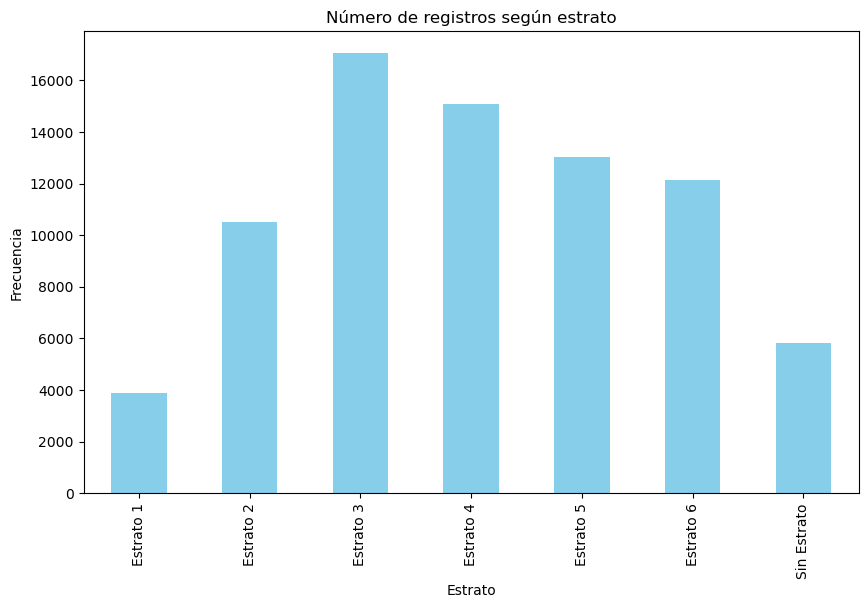

In [21]:
import matplotlib.pyplot as plt


# Se contabilizan los registros de cada categoría en la columna "Estrato"

conteo_estrato = df_def_SB11['FAMI_ESTRATOVIVIENDA'].value_counts()

# Ordenar las categorías por sus valores

conteo_estrato = conteo_estrato.sort_index()

# Creación del gráfico de barras

plt.figure(figsize=(10, 6))
conteo_estrato.plot(kind='bar', color='skyblue')

# Etiquetas y titulo

plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.title('Número de registros según estrato')

# Mostrar el gráfico

plt.show()

En el caso del estrato, hay una presencia significativa de valores nulos (4.977) por tanto, no es recomendable llevar a cabo una imputación a través de medidas como la moda. Adicionalmente, no es una opción eliminar esta cantidad de registros que pueden ser indispensables para los análisis de desempeño académico según las áreas de conocimiento. Finalmente, se tomó la decisión de tomar estos valores nulos como "Sin Estrato" que corresponden a registros que no específicaron su nivel socieconómico. 

Después de todos los procesos realizados. Volvemos a evaluar la presencia de datos nulos:

In [22]:
# Evaluamos los datos nulos o perdidos

nuevos_datos_nulos = df_def_SB11.isnull()

In [23]:
for columna in nuevos_datos_nulos.columns.values.tolist():
    print (nuevos_datos_nulos[columna].value_counts())
    print("")

ESTU_TIPODOCUMENTO
False    77518
Name: count, dtype: int64

ESTU_NACIONALIDAD
False    77518
Name: count, dtype: int64

ESTU_GENERO
False    77518
Name: count, dtype: int64

ESTU_FECHANACIMIENTO
False    77518
Name: count, dtype: int64

PERIODO
False    77518
Name: count, dtype: int64

ESTU_CONSECUTIVO
False    77518
Name: count, dtype: int64

ESTU_PAIS_RESIDE
False    77518
Name: count, dtype: int64

ESTU_TIENEETNIA
False    77518
Name: count, dtype: int64

FAMI_ESTRATOVIVIENDA
False    77518
Name: count, dtype: int64

COLE_CODIGO_ICFES
False    77518
Name: count, dtype: int64

COLE_COD_DANE_ESTABLECIMIENTO
False    77518
Name: count, dtype: int64

COLE_NOMBRE_ESTABLECIMIENTO
False    77518
Name: count, dtype: int64

COLE_GENERO
False    77518
Name: count, dtype: int64

COLE_NATURALEZA
False    77518
Name: count, dtype: int64

COLE_CALENDARIO
False    77518
Name: count, dtype: int64

COLE_BILINGUE
False    77518
Name: count, dtype: int64

COLE_CARACTER
False    77518
Name: count, dty

Dados todos los ejercicios de transformación aplicados, nuestro dataframe ya no cuenta con valores nulos. Podemos proceder al próximo paso. 

### **<span style="color:darkred"> 4. Divsión de Variables Categóricas y Numéricas </span>** 

In [24]:
# Generamos los grupos de información para cada tipo de variable (categóricas y numéricas)

numericas = df_def_SB11.select_dtypes(include=[np.number])
categoricas = df_def_SB11.select_dtypes(exclude=[np.number])



In [25]:
# Variables Numéricas

print(f"Variables Numéricas:\n{(numericas.columns)}")

Variables Numéricas:
Index(['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
       'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
       'PUNT_GLOBAL'],
      dtype='object')


In [26]:
# Variables Categóricas

print(f"Variables Categóricas:\n{(categoricas.columns)}")

Variables Categóricas:
Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO', 'ESTU_PAIS_RESIDE',
       'ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_GENERO', 'COLE_NATURALEZA',
       'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'COLE_DEPTO_UBICACION'],
      dtype='object')


### **<span style="color:darkred"> 5. Análisis Univariado - Variables Categóricas </span>** 

**Evolución del número de estudiantes que realizaron las pruebas saber 11 entre 2019 y 2023 (SEM I)**

In [27]:
'''Construcción de una función que nos permita sacar tablas de frecuencias'''

def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

In [28]:
periodos_d = tabla_freq(df_def_SB11['PERIODO'])

periodos_d

col_0,PERIODO,Frec. Abs.,Frec. Rel.
0,20191,21083,0.271976
1,20201,15398,0.198638
2,20211,15476,0.199644
3,20221,12859,0.165884
4,20231,12702,0.163859


In [55]:
import plotly.graph_objects as go


# Ordenación de los datos por periodo

df_def_SB11 = df_def_SB11.sort_values(by='PERIODO')

# Agrupamos y contamos la cantidad de estudaintes por periodo

estudiantes_por_periodo = df_def_SB11.groupby('PERIODO')['ESTU_CONSECUTIVO'].count()

# Obtener el índice como objeto DatetimeIndex

periodo_index = pd.DatetimeIndex(estudiantes_por_periodo.index)

# Extracción de los años para convertirlos en una lista

años = periodo_index.year.tolist()

# Creación del gráfico interactivo de líneas con Plotly

fig = go.Figure()

# Agregar los datos al gráfico

fig.add_trace(go.Scatter(x=estudiantes_por_periodo.index, y=estudiantes_por_periodo.values, mode='lines+markers', name='Cantidad de estudiantes'))

# Configuración del diseño del gráfico

fig.update_layout(
    title='Evolución del número de estudiantes que presentaron el examen Saber 11 - Semestre I',
    xaxis_title='Año',
    yaxis_title='Cantidad de estudiantes',
    xaxis=dict(
        tickvals=años,
        ticktext=años
    )
)

# Agregar etiquetas al pasar el mouse sobre los puntos

fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad de estudiantes: %{y}')

# Mostrar el gráfico interactivo

fig.show()


**Interpretación:**

Entre 2019 y 2023 (Semestre I), un total de 77.524 estudiantes en Colombia realizaron las pruebas saber 11, que son obligatorias para todos lo jóvenes que terminan la etapa escolar. Sin embargo, se evidencia un panorama alarmante en el número de personas que año a año acceden a la prueba. 

En 2023 se identificó una caída del 39,7% en el número de estudiantes que realizaron la prueba, lo cual podría tener varias implicaciones o hipotesis que serían interesantes a validar incluyendo o complementando más información a este análisis:

- La composición poblacional se está acortando drasticamente, pues es posible que cada vez haya menos nacimientos que estén generando un impacto en la cantidad de jóvenes que acceden al sistema de educación. 

- También, es probable que teniendo en cuenta los impactos económicos y sociales que ha tenido el país en los últimos años se esté presentando un problema de accesibilidad a la educación media. 

- Por otro lado, analizando el sector de la educación superior, esto sugiere un reto importante para las universidades a nivel nacional, las cuáles se han visto afectadas en el número de personas interesadas en ingresar a estudiar programas de pregrado. Estas cifras podrían ser una de las explicaciones, pues el mercado se está contrayendo y es mucho más difícil para las IES atraer estudiantes que estén dispuestos a iniciar una carrera universitaria. 



**Evolución del número de estudiantes que presentaron las pruebas saber 11 - Departamentos Seleccionados**

Revisamos que la información en la columna de los departamentos no tenga categorías escritas de formas distintas. En caso de haber alguno con tipificaciones erróneas, procedemos a arreglarlo:

In [30]:
Unicos_Departamentos = df_def_SB11['COLE_DEPTO_UBICACION'].unique()

print (Unicos_Departamentos)


['VALLE' 'ANTIOQUIA' 'NARIÑO' 'SANTANDER' 'BOGOTA' 'CALDAS' 'TOLIMA'
 'ATLANTICO' 'META' 'CUNDINAMARCA' 'CAQUETA' 'MAGDALENA' 'CASANARE'
 'CAUCA' 'RISARALDA' 'BOLIVAR' 'GUAINIA' 'NORTE SANTANDER' 'LA GUAJIRA'
 'BOYACA' 'SUCRE' 'CESAR' 'ARAUCA' 'HUILA' 'QUINDIO' 'CORDOBA' 'GUAVIARE'
 'CHOCO' 'PUTUMAYO' 'BOGOTÁ']


In [31]:
#Reemplazamos todas las categorías "Bogota" por "Bogotá"

df_def_SB11['COLE_DEPTO_UBICACION'] = df_def_SB11['COLE_DEPTO_UBICACION'].replace('BOGOTA', 'BOGOTÁ')

# Verificar el resultado
print(df_def_SB11['COLE_DEPTO_UBICACION'].unique())

['VALLE' 'ANTIOQUIA' 'NARIÑO' 'SANTANDER' 'BOGOTÁ' 'CALDAS' 'TOLIMA'
 'ATLANTICO' 'META' 'CUNDINAMARCA' 'CAQUETA' 'MAGDALENA' 'CASANARE'
 'CAUCA' 'RISARALDA' 'BOLIVAR' 'GUAINIA' 'NORTE SANTANDER' 'LA GUAJIRA'
 'BOYACA' 'SUCRE' 'CESAR' 'ARAUCA' 'HUILA' 'QUINDIO' 'CORDOBA' 'GUAVIARE'
 'CHOCO' 'PUTUMAYO']


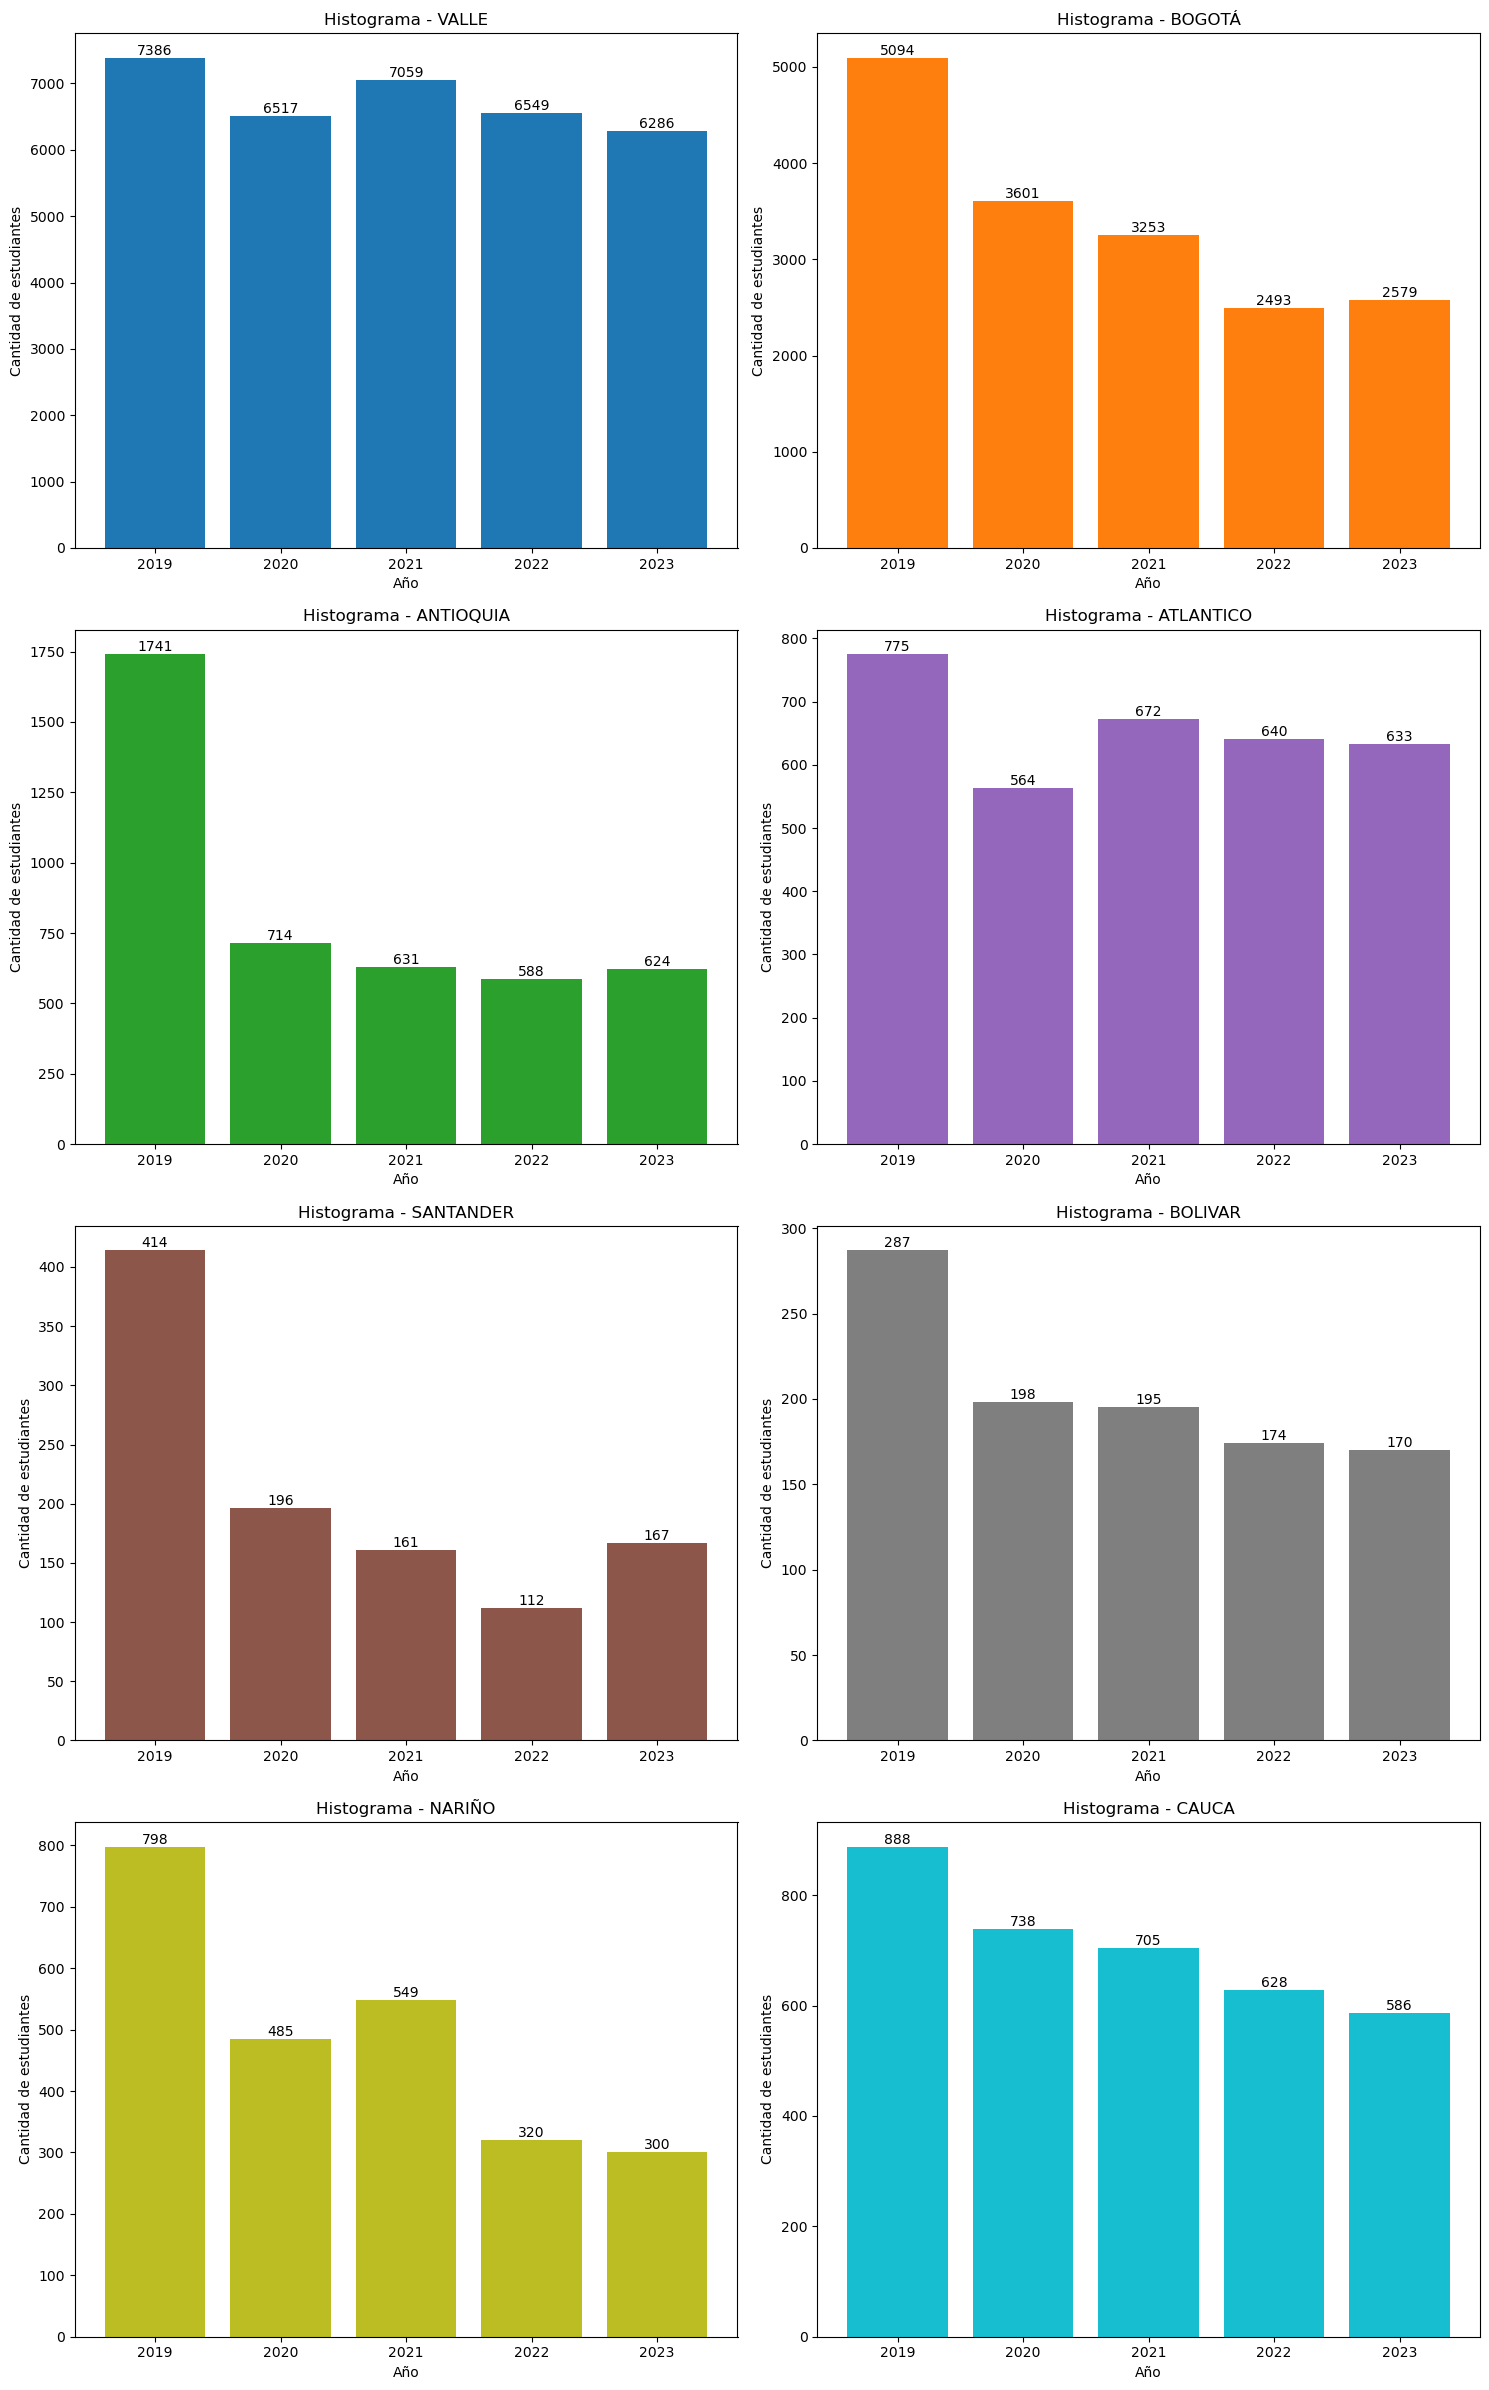

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'PERIODO' a tipo datetime

df_def_SB11['PERIODO'] = pd.to_datetime(df_def_SB11['PERIODO'], format='%Y%m')

# Nos concentramos en los departamentos objetivo

departamentos_seleccionados = ['VALLE', 'BOGOTÁ', 'ANTIOQUIA', 'ATLANTICO', 'SANTANDER', 'BOLIVAR', 'NARIÑO', 'CAUCA']
df_seleccionados = df_def_SB11[df_def_SB11['COLE_DEPTO_UBICACION'].isin(departamentos_seleccionados)]

# Filas y columnas para organizar los subgráficos

num_filas = (len(departamentos_seleccionados) + 1) // 2  # División entera para asegurar que obtengamos un número entero de filas
num_columnas = 2  # Dos columnas por fila

# Creación de los subgráficos con la disposición deseada

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 6 * num_filas))

# Colores para asignar a cada departamento

colores = plt.cm.get_cmap('tab10', len(departamentos_seleccionados))

# Iterar sobre los departamentos objetivo y se procede a crear un histograma para cada un
o
for i, departamento in enumerate(departamentos_seleccionados):
    # Coordenadas del subgráfico actual
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Filtrar los datos para el departamento actual

    df_departamento = df_seleccionados[df_seleccionados['COLE_DEPTO_UBICACION'] == departamento]
    
    # Conteo de estudiantes por periodo

    estudiantes_por_periodo = df_departamento.groupby(df_departamento['PERIODO'].dt.year)['ESTU_CONSECUTIVO'].count()
    
    # Crear el histograma para el departamento

    bars = axs[fila, columna].bar(estudiantes_por_periodo.index, estudiantes_por_periodo.values, color=colores(i))
    axs[fila, columna].set_title(f'Histograma - {departamento}')
    axs[fila, columna].set_xlabel('Año')
    axs[fila, columna].set_ylabel('Cantidad de estudiantes')
    
    # Se agregan etiquetas de texto a cada barra para poder interpretar la información con mayor facilidad

    for bar in bars:
        height = bar.get_height()
        axs[fila, columna].text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Ajustamos el espacio entre los subgráficos
        
plt.tight_layout()
plt.show()


**Interpretación:**

Teniendo en cuenta los deparamentos de interés, se observa en la información de los histogramas que los departamentos que han sufrido un impacto más importante en la disminución de los estudiantes de último año que están presentando las pruebas son: Bogotá, Antioquia, Santander y Nariño. 

Si nuevamente concentramos el análisis en el impacto que puede sugerir esto para las Instituciones de Educación Superior, se evidencia que para estas zonas del país las universidades (en su mayor proproción privadas), se estarían enfrentando a una crisis de admisión a sus programas académicos, pues los nichos de mercado se están recortando drásticamente. 

En el caso del Valle de Cauca, y especialmente para cluster de universidades de la ciudad de Cali, a pesar de no presentarse un impacto muy importante en el Valle, muchos de los estudiantes de la zona de influencia (Cauca y Nariño por ejemplo), toman la decisión de migrar a esta ciudad para realizar sus estudios universitarios. El hecho de que disminuya la cantidad de personas que estarían presentando la prueba, sugiere una menor proporción de estudiantes que decidirían viajar a la ciudad a continuar con sus estudios profesionales, por ende, podría suponer un impacto negativo en las inscripcioens de las universidades de estas zonas del País. 

**Análisis de la proproción de estudiantes que presentaron las pruebas saber 11 según género (2019-2023)**

In [33]:
# Construcción de una tabla de frecuencias para la variable género:

def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

In [34]:
# Lista de departamentos seleccionados

departamentos_seleccionados = ['VALLE', 'BOGOTÁ', 'ANTIOQUIA', 'ATLANTICO', 'SANTANDER', 'BOLIVAR', 'NARIÑO', 'CAUCA']

# Se elabora un diccionario para almacenar las tablas de frecuencias de cada departamento

tablas_frecuencia_departamentos = {}

# Iterar sobre los departamentos seleccionados y se lleva a cabo el cálculo de la tabla de frecuencias para cada uno

for departamento in departamentos_seleccionados:
    # Filtrar el DataFrame por el departamento actual

    df_departamento = df_def_SB11[df_def_SB11['COLE_DEPTO_UBICACION'] == departamento]
    
    # Calcular la tabla de frecuencias para el género en el departamento actual

    tabla_frecuencia = tabla_freq(df_departamento['ESTU_GENERO'])
    
    # Se guarda la tabla de frecuencias en el diccionario

    tablas_frecuencia_departamentos[departamento] = tabla_frecuencia

# Mostrar las tablas de frecuencias para cada departamento
    
for departamento, tabla in tablas_frecuencia_departamentos.items():
    print(f"Tabla de frecuencias para el departamento {departamento}:")
    print(tabla)
    print()

Tabla de frecuencias para el departamento VALLE:
col_0 ESTU_GENERO  Frec. Abs.  Frec. Rel.
0               F       17204    0.509039
1               M       16593    0.490961

Tabla de frecuencias para el departamento BOGOTÁ:
col_0 ESTU_GENERO  Frec. Abs.  Frec. Rel.
0               F        8413    0.494301
1               M        8607    0.505699

Tabla de frecuencias para el departamento ANTIOQUIA:
col_0 ESTU_GENERO  Frec. Abs.  Frec. Rel.
0               F        2268    0.527687
1               M        2030    0.472313

Tabla de frecuencias para el departamento ATLANTICO:
col_0 ESTU_GENERO  Frec. Abs.  Frec. Rel.
0               F        1599    0.486906
1               M        1685    0.513094

Tabla de frecuencias para el departamento SANTANDER:
col_0 ESTU_GENERO  Frec. Abs.  Frec. Rel.
0               F         522    0.497143
1               M         528    0.502857

Tabla de frecuencias para el departamento BOLIVAR:
col_0 ESTU_GENERO  Frec. Abs.  Frec. Rel.
0             

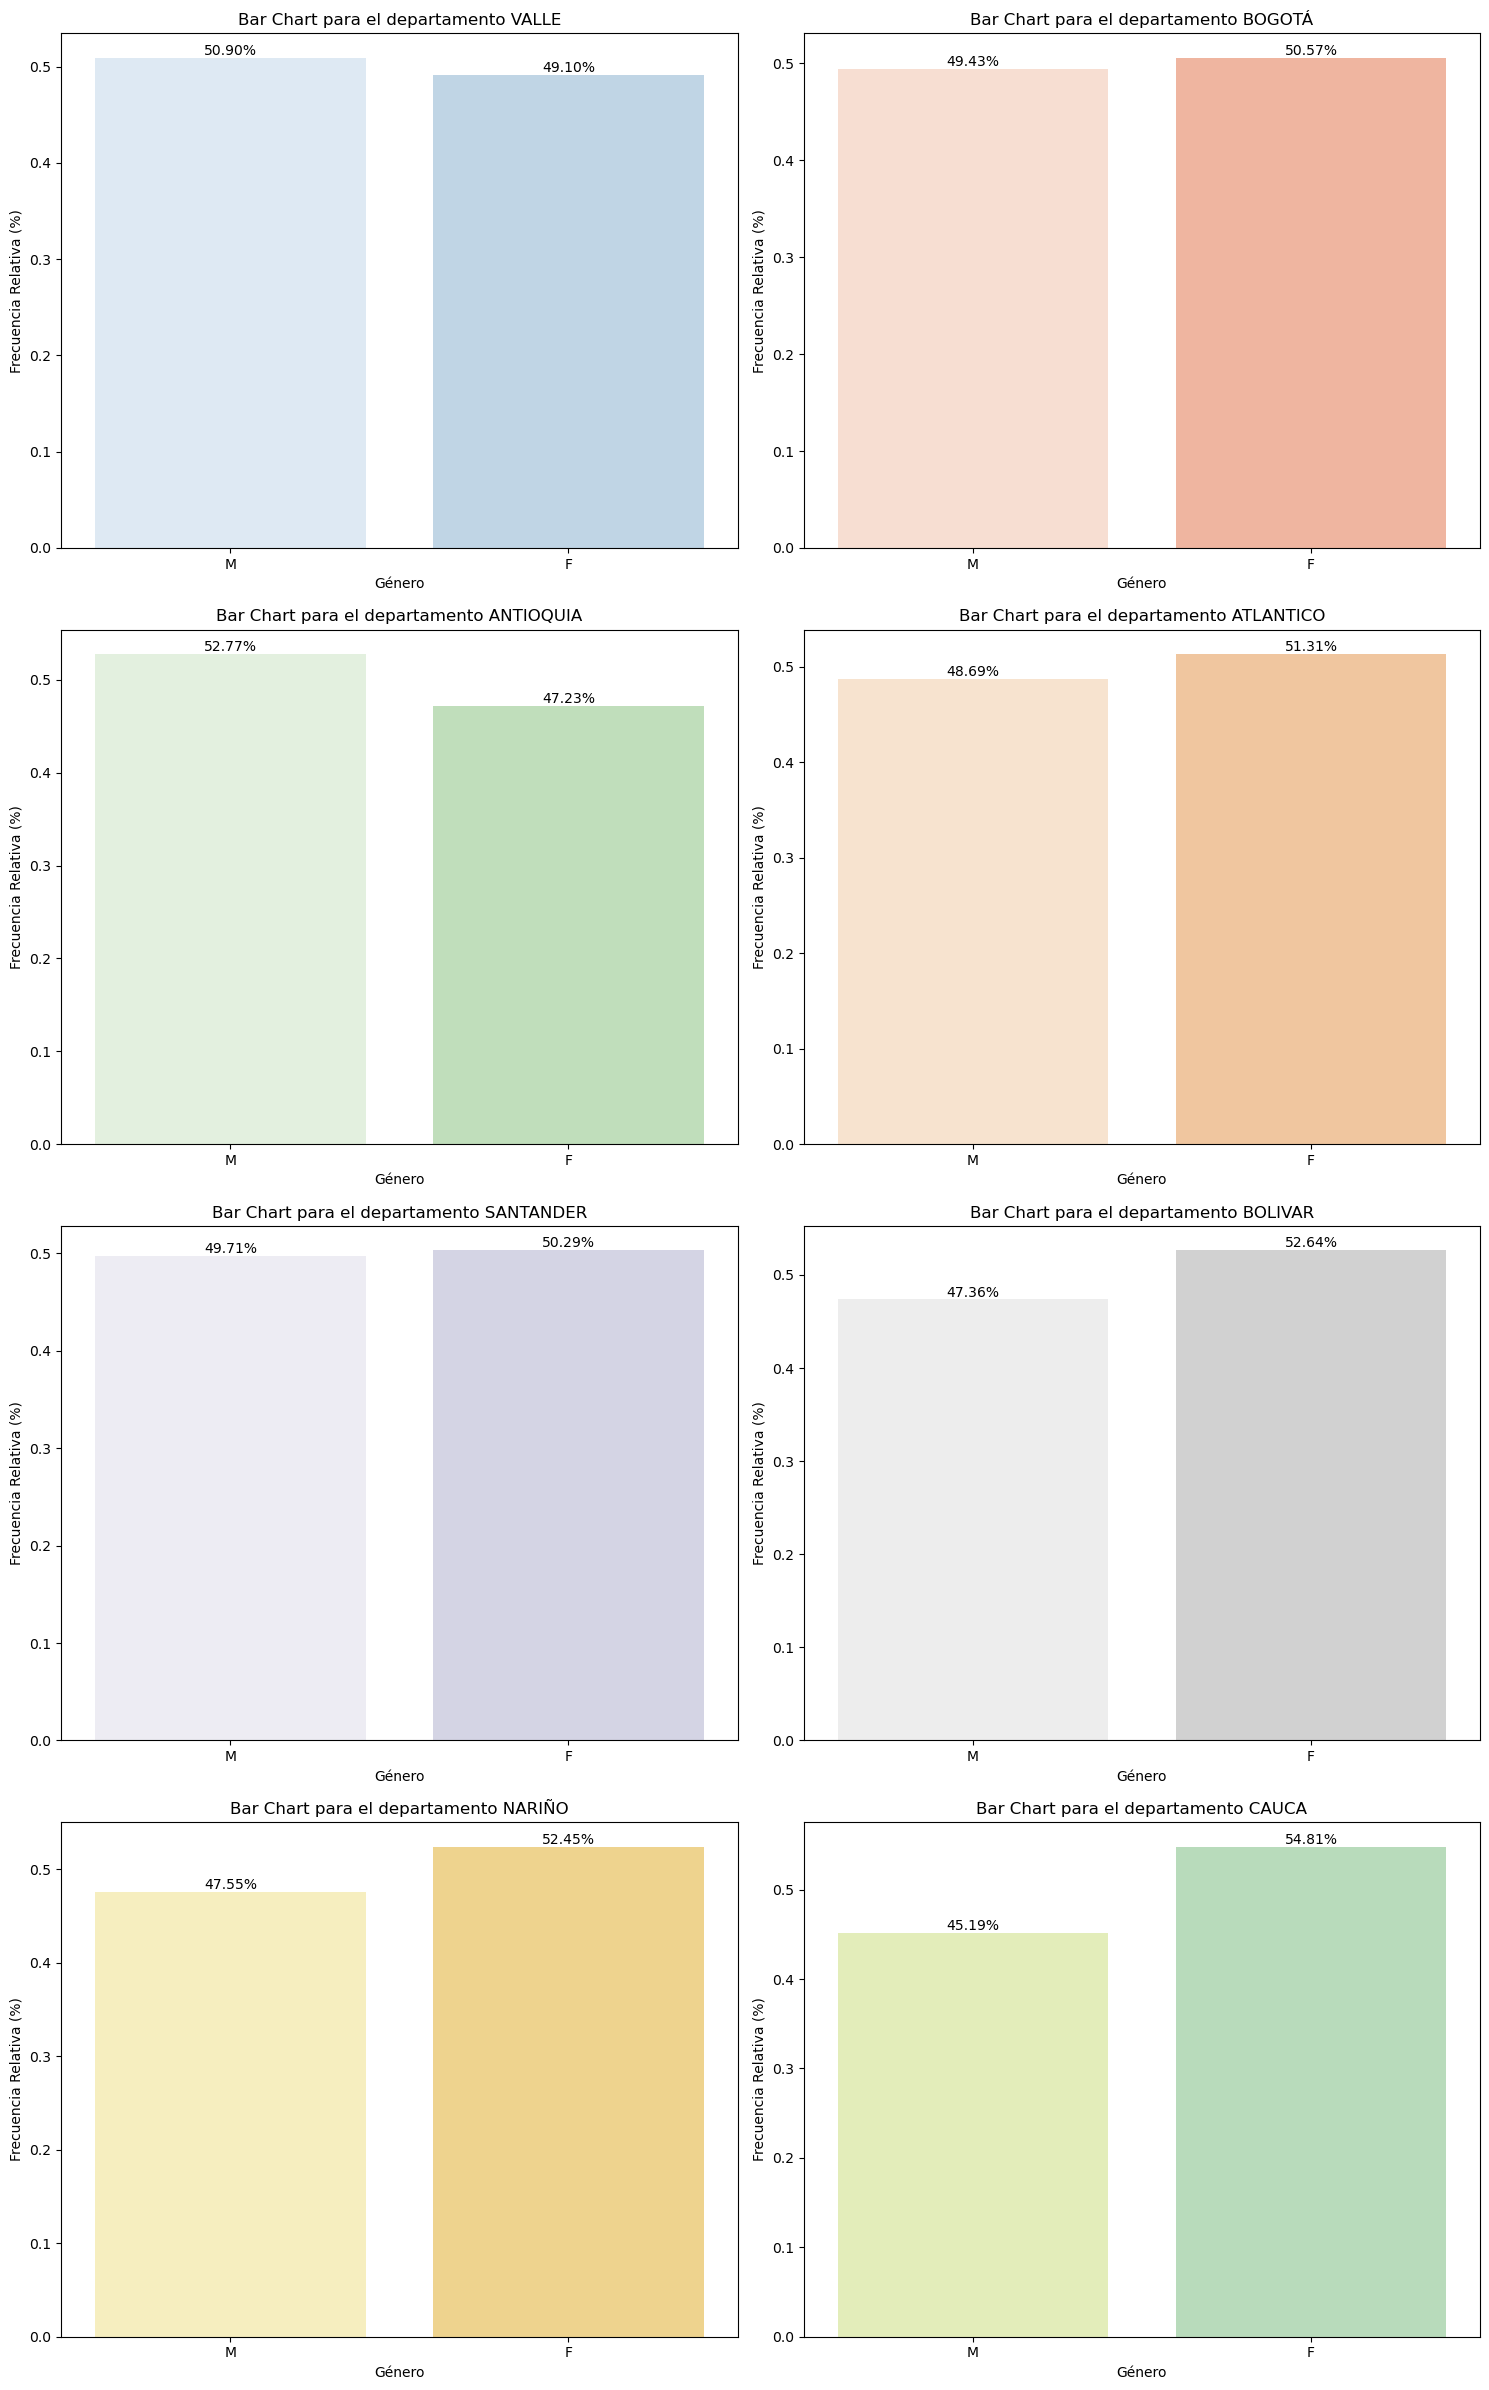

In [35]:

# Configuración de colores para cada departamento

paletas = ['Blues', 'Reds', 'Greens', 'Oranges', 'Purples', 'Greys', 'YlOrBr', 'YlGnBu']

# Calcular el número de filas y columnas

num_filas = (len(tablas_frecuencia_departamentos) + 1) // 2  
num_columnas = 2

# Crear subplots para los gráficos de barras

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 6*num_filas))

# Iterar sobre el diccionario de tablas de frecuencias
for i, (departamento, tabla) in enumerate(tablas_frecuencia_departamentos.items()):
    # Calcular la posición del subplot en la matriz de subplots

    fila = i // num_columnas
    columna = i % num_columnas
    # Seleccionar la paleta de colores para el departamento actual

    paleta = sns.color_palette(paletas[i % len(paletas)])

    # Crear el gráfico de barras para el departamento actual

    ax = axs[fila, columna]
    barplot = sns.barplot(ax=ax, x=tabla.index, y='Frec. Rel.', data=tabla, palette=paleta)
    ax.set_title(f'Bar Chart para el departamento {departamento}')
    ax.set_xlabel('Género')
    ax.set_ylabel('Frecuencia Relativa (%)')

    # Eliminar las líneas de la cuadrícula en el eje y

    ax.grid(axis='y', which='both', linestyle='-', linewidth=0) 

    # Cambiar las etiquetas del eje x

    ax.set_xticklabels(['M', 'F'])  

    # Añadir porcentaje en las barras

    for p in barplot.patches:
        ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Espacio entre subplots
        
plt.tight_layout()

# Mostrar los gráficos de barras

plt.show()

**Interpretación:** entre los departamentos seleccionados, se encontró que la composición del género en la mayoría de los departamentos es equitativa entre los hombres y mujeres. En el departamento del Cauca, fue donde se encontró la diferencia más alta entre la proporción de mujeres y hombres que presentaron las pruebas saber 11 entre 2019 y 2023 (9,62 puntos porcentuales)

### **<span style="color:darkred"> 6. Análisis Univariado - Variables Numéricas </span>** 

**Estadísitcas descriptivas para el puntaje global según periodo de aplicación (2019-2023 Semestre I)**

In [36]:
df_def_SB11.groupby('PERIODO')['PUNT_GLOBAL'].describe()

,count,mean,std,min,25%,50%,75%,max
PERIODO,,,,,,,,
2019-01-01,21083.0,281.569890,66.183667,68.0,226.0,286.0,337.0,470.0
2020-01-01,15398.0,289.626705,60.200713,0.0,245.0,295.0,336.0,479.0
2021-01-01,15476.0,302.077152,57.459111,22.0,263.0,309.0,345.0,495.0
2022-01-01,12859.0,315.322731,47.706508,100.0,285.0,321.0,350.0,476.0
2023-01-01,12702.0,316.859943,48.051774,140.0,287.0,323.0,352.0,478.0


**Interpretación:** A pesar de que el número de estudiantes que han presentado las pruebas saber 11 en Colombia ha disminuido drásticamente en el caso de los colegios de Calendario B, se observa que, el comportamiento del puntaje global promedio ha tenido un aumento significativo en los últimos cinco años. Paso de estar en 281 puntos en 2019 a 316 en 2023. 

A pesar de este cambio positivo en el promedio de los puntajes, se observa que para el último año disponible la mayoría de los estudiantes obtuvo un puntaje relativamente bajo-intermedio, pues el 75% de los resultados se encuentran por debajo de los 352 puntos. 

**Comparación del desempeño en puntaje global obtenido por los estudiantes en las pruebas saber 11 por periodo (2019-I a 2023-I)**


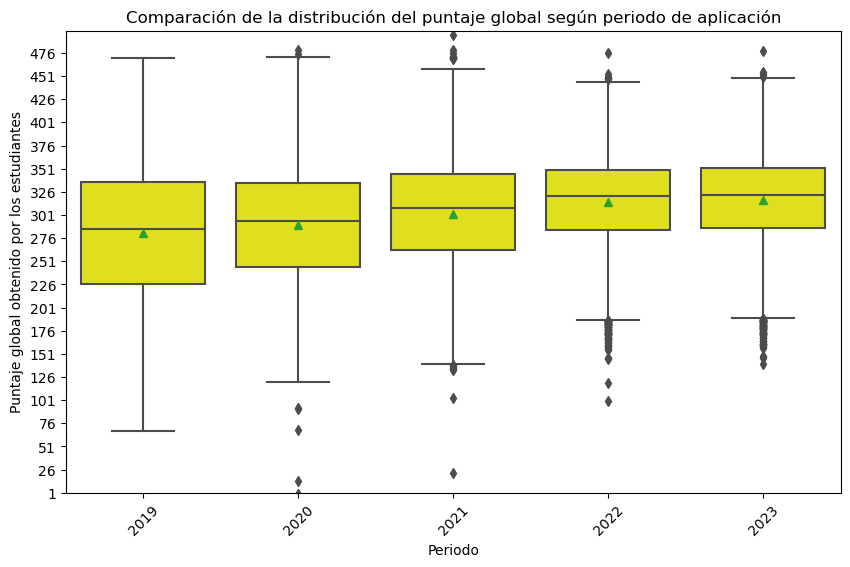

In [37]:
# Tamaño del gráfico

plt.figure(figsize=(10, 6))

# Creación del boxplot

boxplot_desempeno = sns.boxplot(x=df_def_SB11['PERIODO'].dt.year, y=df_def_SB11['PUNT_GLOBAL'], color="yellow", showmeans=True)

# Etiquetas y titulos

boxplot_desempeno.set_xlabel('Periodo')
boxplot_desempeno.set_ylabel('Puntaje global obtenido por los estudiantes')
boxplot_desempeno.set_ylim(1, 500)
boxplot_desempeno.set_yticks(range(1, 500, 25))
boxplot_desempeno.set_title('Comparación de la distribución del puntaje global según periodo de aplicación')

# Establecemos la etiquetas en años

plt.xticks(ticks=range(len(df_def_SB11['PERIODO'].dt.year.unique())), labels=df_def_SB11['PERIODO'].dt.year.unique(), rotation=45)

plt.show()

**Interpretación:**

Entre 2019-I y 2023-I, el desempeño en el puntaje global de las pruebas saber 11 ha presentado una evolución positiva. Sin embargo, también se destaca la disminución en el número de estudiantes que realizan el cuestionario.

Adicionalmente, se observa en el último periodo disponible una alta presencia de datos atípicos que se encuentran en un rango de puntajes que van de 140 a 176.

Llevamos a cabo un ejercicio para identificar el número de datos atípicos para el periodo 2023-I:

In [44]:
df_def_SB11['PERIODO'] = df_def_SB11['PERIODO'].astype(str)

df_2023 = df_def_SB11[df_def_SB11['PERIODO'].str.contains('2023')]

In [49]:
#Función para calcular IQR

def find_outliers_IQR(df_2023):
   q1=df_2023.quantile(0.25)
   q3=df_2023.quantile(0.75)
   IQR=q3-q1
   outliers = df_2023[ ((df_2023<(q1-1.5*IQR)) | (df_2023>(q3+1.5*IQR))) ]
   return outliers

In [52]:
outliers = find_outliers_IQR(df_2023['PUNT_GLOBAL'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 105
max valor outlier: 478
min valor outlier: 140
73431    185
73270    157
73285    173
73318    180
73470    188
        ... 
69028    177
69248    186
69250    165
69246    168
69150    180
Name: PUNT_GLOBAL, Length: 105, dtype: int64


**Interpretación:** teniendo en cuenta el desempeño de los estudiantes durante las pruebas aplicadas en 2023-I, se encontraron 105 jóvenes que obtuvieron puntajes por fuera del comportamiento normal de dicha cohorte. Adicionalmente, se encontró que el puntaje más bajo obtenido fue 140 puntos y el máximo 478.

**Análisis de la distribución de los puntajes globales por género (2019-2023 Semestre I)**

**Información para las mujeres**

In [41]:
# Construcción de la función para la Tabla completa de Estadísticas Descriptivas

def tabla_descriptivas_completa (columnas):

    tabla_descriptivas_completa=pd.DataFrame(columnas.describe())
    tabla_descriptivas_completa.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas_completa.loc['skew']=skew(columnas)
    tabla_descriptivas_completa.loc['kurtosis']=kurtosis(columnas)

    return tabla_descriptivas_completa

In [42]:
#Filtramos la base de datos para solamente tener la información de las mujeres


df_mujeres = df_def_SB11[df_def_SB11['ESTU_GENERO'] == 'F']


df_mujeres.head(5) 



,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,TI,COLOMBIA,F,2000-12-07 00:00:00,2019-01-01,SB11201910008548,COLOMBIA,No,Estrato 4,114686,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,76001,76,VALLE,50,49,47,40,54.0,235
14062,TI,COLOMBIA,F,2002-08-19 00:00:00,2019-01-01,SB11201910004156,COLOMBIA,No,Estrato 6,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,70,78,75,74,86.0,376
14061,TI,COLOMBIA,F,2002-07-12 00:00:00,2019-01-01,SB11201910004528,COLOMBIA,No,Estrato 6,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,71,77,77,100,83.0,407
14060,TI,COLOMBIA,F,2002-02-22 00:00:00,2019-01-01,SB11201910004157,COLOMBIA,No,Estrato 6,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,70,77,72,67,82.0,362
14063,TI,COLOMBIA,F,2002-12-10 00:00:00,2019-01-01,SB11201910004359,COLOMBIA,No,Estrato 6,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,80,79,77,79,92.0,399


In [43]:
from scipy.stats import skew, kurtosis  ## funciones estadísticas
tabla_descriptivas_completa(df_mujeres['PUNT_GLOBAL'])

,PUNT_GLOBAL
count,38649.000000
mean,296.779865
std,58.858005
min,68.000000
25%,256.000000
50%,306.000000
75%,342.000000
max,475.000000
coef. variation,0.198322
skew,-0.417715


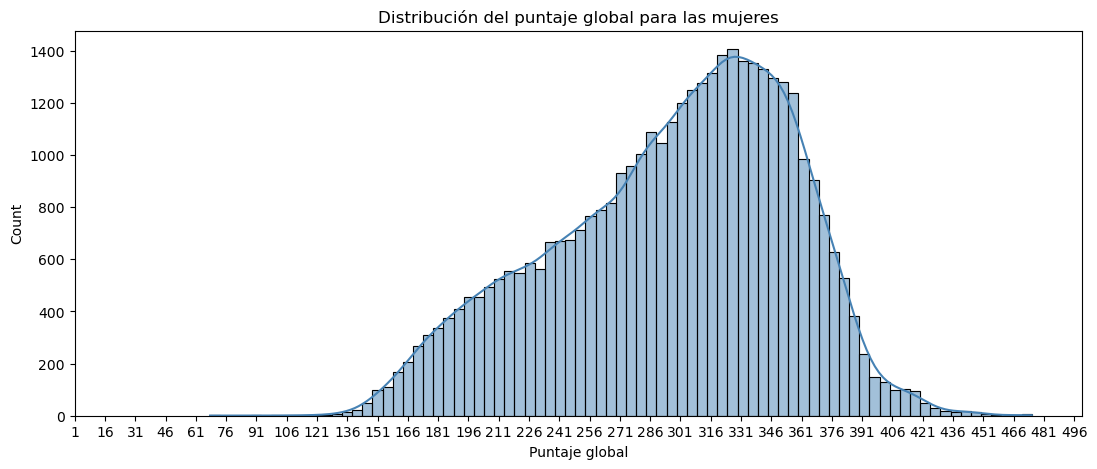

In [44]:
# Construcción de la gráfica de distribución de la variable

plt.figure(figsize=(13,5))
hist_age=sns.histplot(x=df_mujeres['PUNT_GLOBAL'],kde=True,color="steelblue") ## crea el boxplot
hist_age.set_xlabel('Puntaje global') ## cambia el título del eje x
hist_age.set_xlim(1, 500)                     ## cambia los límites del eje x
hist_age.set_xticks(range(1,500,15))             ## cambia los valores del eje x
hist_age.set_title('Distribución del puntaje global para las mujeres')
plt.show()

**Información para los hombres**

In [45]:
#Filtramos la base de datos para solamente tener la información de los hombres


df_hombres = df_def_SB11[df_def_SB11['ESTU_GENERO'] == 'M']


df_hombres.head(5) 

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
14059,TI,COLOMBIA,M,2001-04-18 00:00:00,2019-01-01,SB11201910004170,COLOMBIA,No,Estrato 5,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,75,72,69,67,79.0,357
14058,TI,COLOMBIA,M,2002-01-05 00:00:00,2019-01-01,SB11201910004136,COLOMBIA,No,Estrato 6,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,82,82,77,81,100.0,410
14057,TI,COLOMBIA,M,2002-06-05 00:00:00,2019-01-01,SB11201910004257,COLOMBIA,No,Estrato 6,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,76,73,72,64,83.0,361
14056,TI,COLOMBIA,M,2002-09-21 00:00:00,2019-01-01,SB11201910004247,COLOMBIA,No,Estrato 5,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,64,73,70,62,76.0,340
14055,TI,COLOMBIA,M,2001-08-04 00:00:00,2019-01-01,SB11201910004398,COLOMBIA,No,Estrato 5,41996,305001010781,COL MONTESSORI,MIXTO,NO OFICIAL,B,N,ACADÉMICO,305001010781,COL MONTESSORI,S,RURAL,COMPLETA,5001,5,ANTIOQUIA,65,66,68,56,79.0,325


In [46]:
tabla_descriptivas_completa(df_hombres['PUNT_GLOBAL'])

,PUNT_GLOBAL
count,38869.000000
mean,300.501711
std,59.810925
min,0.000000
25%,258.000000
50%,309.000000
75%,347.000000
max,495.000000
coef. variation,0.199037
skew,-0.377523


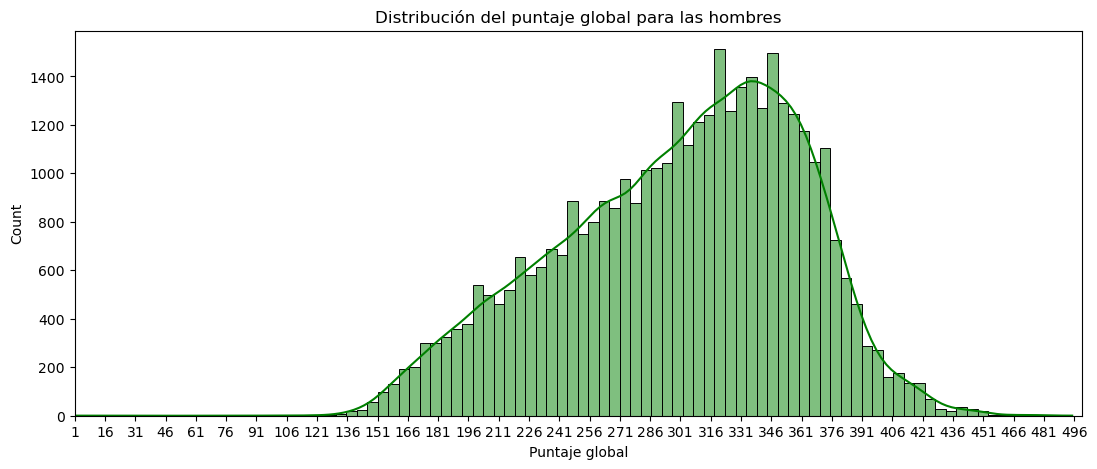

In [61]:
# Construcción de la gráfica de distribución de la variable

plt.figure(figsize=(13,5))
hist_age=sns.histplot(x=df_hombres['PUNT_GLOBAL'],kde=True,color="green") ## crea el boxplot
hist_age.set_xlabel('Puntaje global') ## cambia el título del eje x
hist_age.set_xlim(1, 500)                     ## cambia los límites del eje x
hist_age.set_xticks(range(1,500,15))             ## cambia los valores del eje x
hist_age.set_title('Distribución del puntaje global para las hombres')
plt.show()

**Interpretación:** teniendo en cuenta los gráficos generados para revisar cuál ha sido el comportamiento de la distribución del puntaje global entre hombres y mujeres en los últimos cinco años (2019-2023) en las pruebas saber 11, se encontró que hay muy pocas diferencias entre ambos géneros. Ambos, tienen una alta concentración de estudiantes que obtienen puntajes que se encuentran en el rango de 300 a 361 puntos. También, se puede concluir gráficamente que ambas distribuciones se comportan de forma normal.

**Comparación de la distribución del puntaje global en las pruebas saber 11 (2019 a 2023) - Departamentos Seleccionados**

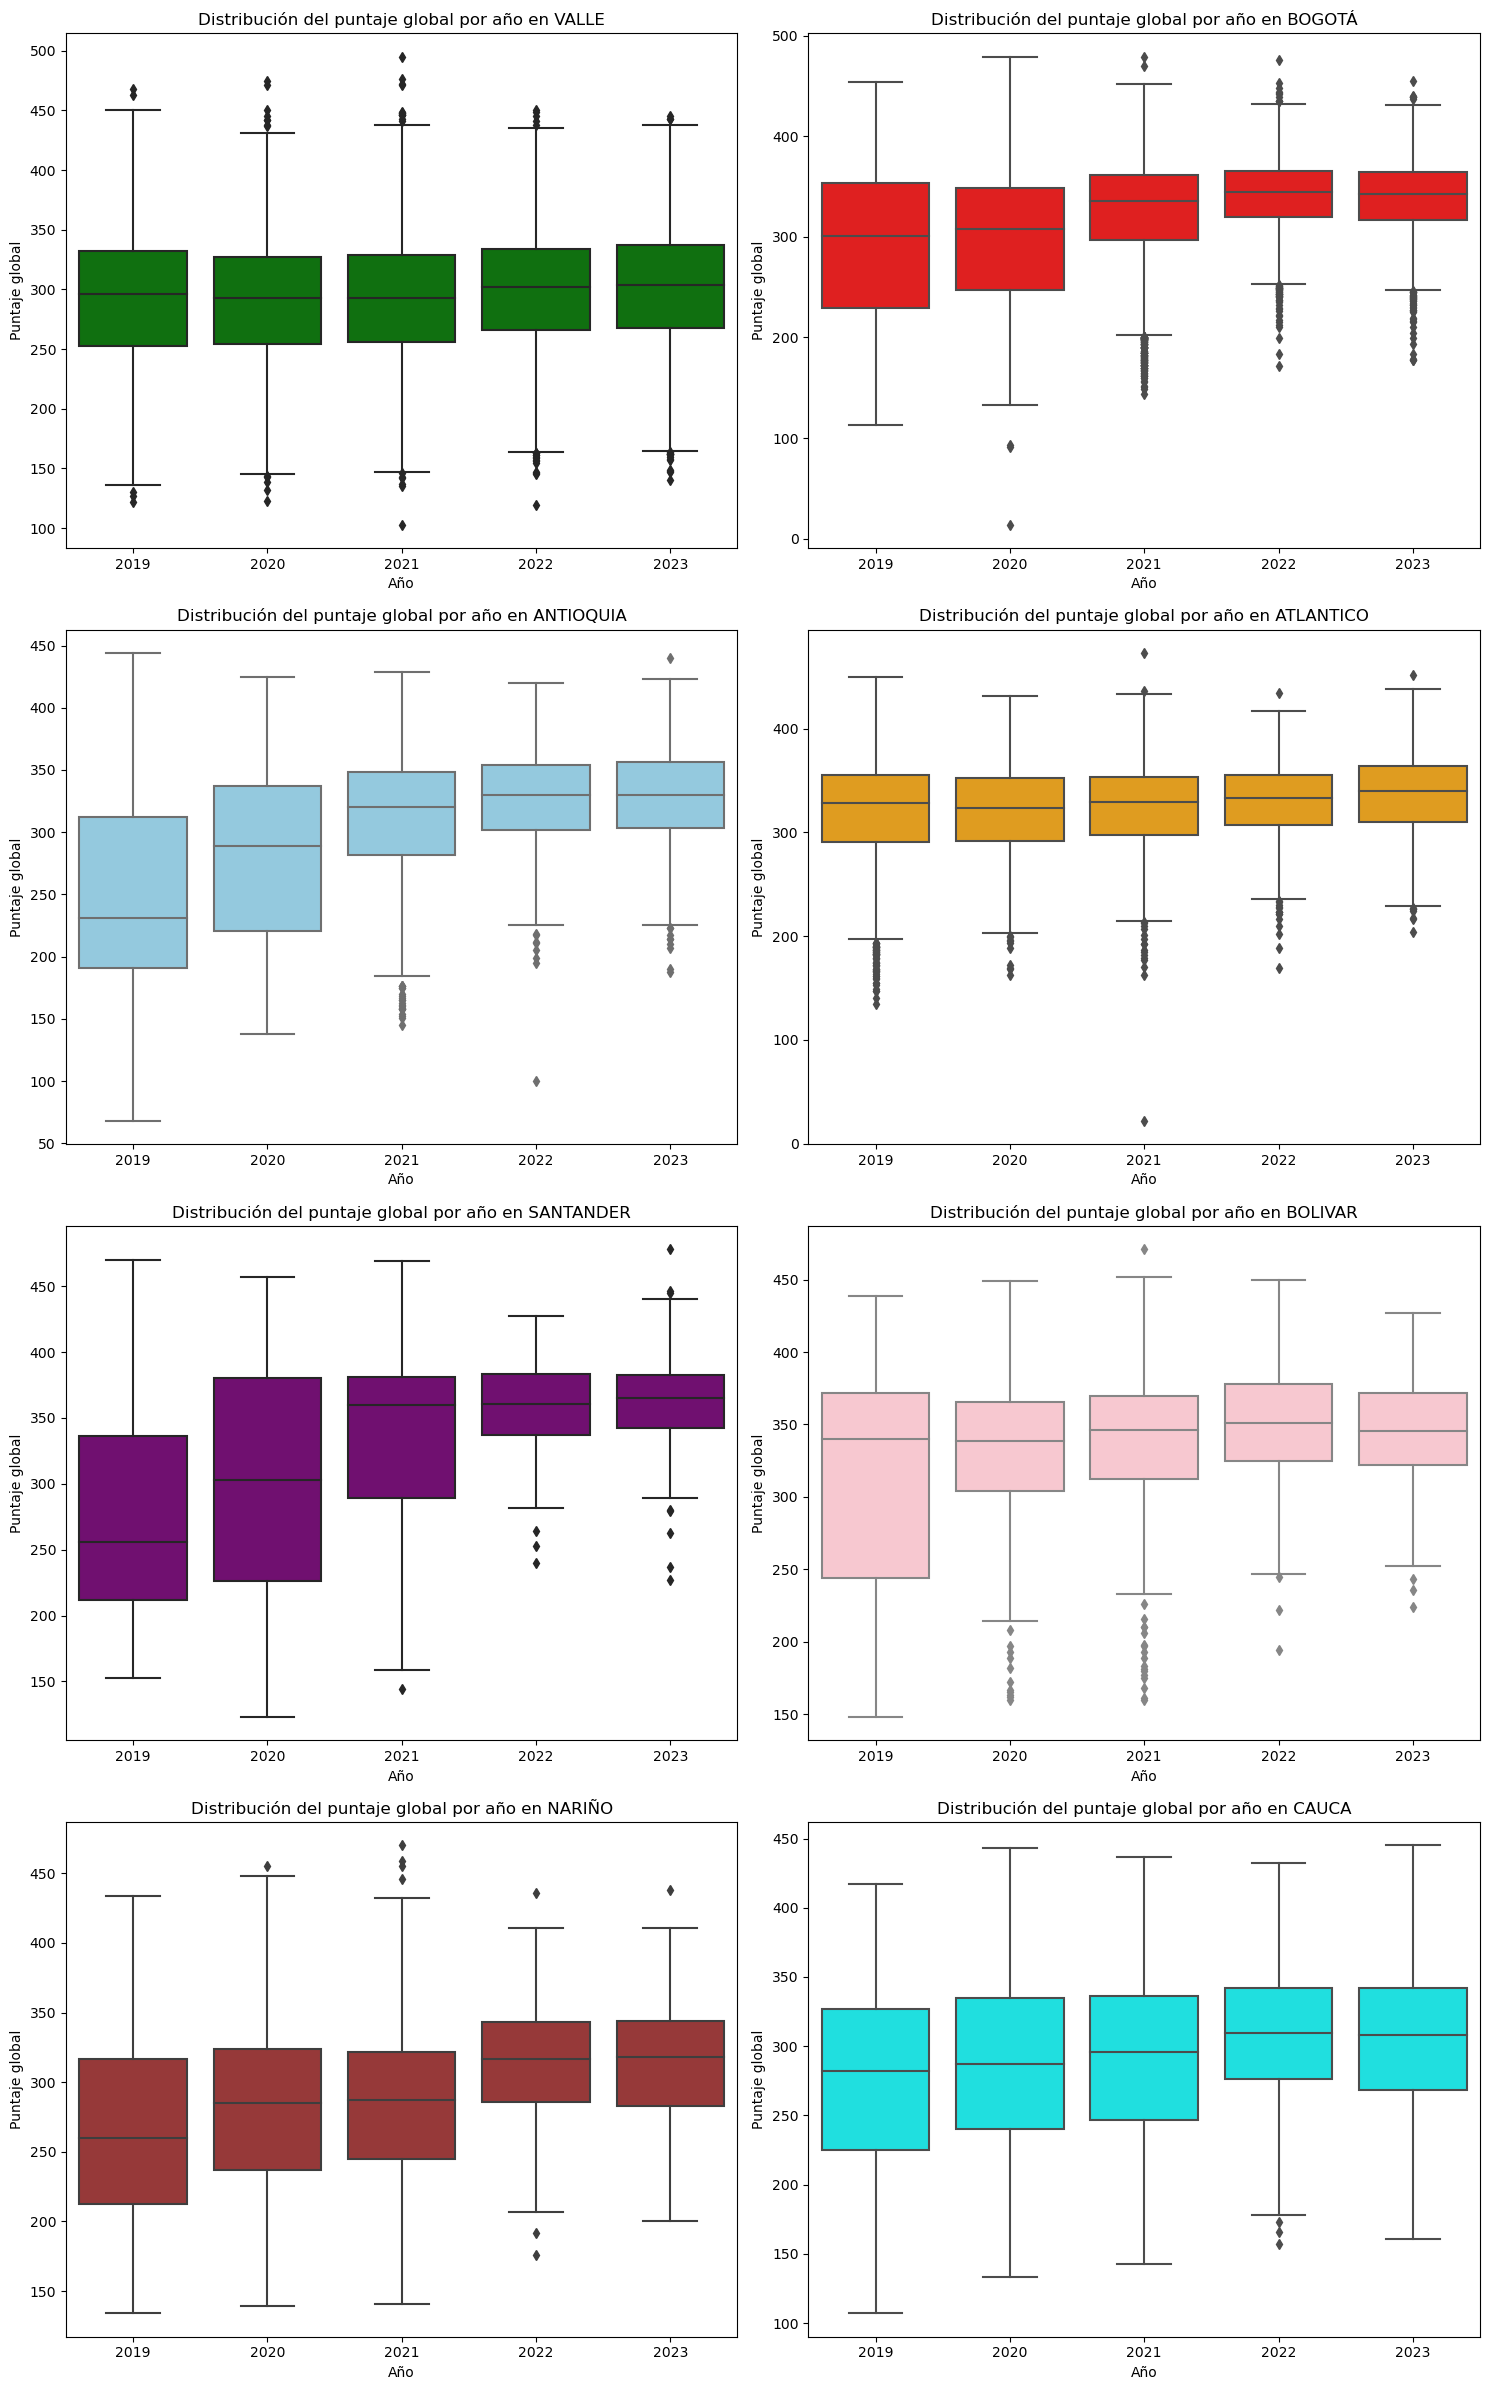

In [48]:
# Departamentos de interés para el análisis

dptos_seleccionados = ['VALLE', 'BOGOTÁ', 'ANTIOQUIA', 'ATLANTICO', 'SANTANDER', 'BOLIVAR', 'NARIÑO', 'CAUCA']

# Filtra el DataFrame para los departamentos seleccionados

df_dptos_seleccionados = df_def_SB11[df_def_SB11['COLE_DEPTO_UBICACION'].isin(dptos_seleccionados)]

# Colores para cada departamento

colores = {'VALLE': 'green', 'BOGOTÁ': 'red', 'ANTIOQUIA': 'skyblue', 'ATLANTICO': 'orange', 
           'SANTANDER': 'purple', 'BOLIVAR': 'pink', 'NARIÑO': 'brown', 'CAUCA': 'cyan'}

# Calcula el número de filas y columnas para organizar los subgráficos

num_filas = (len(dptos_seleccionados) + 1) // 2
num_columnas = 2

# Crea una cuadrícula de subgráficos

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 6 * num_filas))

# Iterar sobre los departamentos seleccionados y dibuja un boxplot para cada uno

for i, departamento in enumerate(dptos_seleccionados):
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Filtra el DataFrame para el departamento actual

    df_departamento = df_dptos_seleccionados[df_dptos_seleccionados['COLE_DEPTO_UBICACION'] == departamento]
    
    #Boxplot del subgráfico correspondiente

    sns.boxplot(x=df_departamento['PERIODO'].dt.year, y=df_departamento['PUNT_GLOBAL'], ax=axs[fila, columna], color=colores[departamento])
    
    # Etiquetas y titulos del subgráfico

    axs[fila, columna].set_xlabel('Año')
    axs[fila, columna].set_ylabel('Puntaje global')
    axs[fila, columna].set_title(f'Distribución del puntaje global por año en {departamento}')

# Espacio entre subgráficos
    
plt.tight_layout()

plt.show()

**Interpretación:**

Entre los departamentos seleccionados, los dos que evidencian una evolución de la distribución del puntaje global son Antioquia y Santander. En el caso del Valle del Cauca, a pesar de presentar un comportamiento constante a lo largo de los periodos analizados, es quizá el único departamento que no sufre cambios significativos en la cantidad de estudiantes que aplicaron la prueba, en los otros departamentos, como hemos visto en gráficos anteriores la población de estudiantes se ha reducido de forma importante. 

### **<span style="color:darkred"> 7. Análisis de correlación entre variables </span>** 

**Análisis de correlación de pearson**

Utilizaremos el coeficiente de pearson para analizar si hay relación entre los puntajes de las diferentes áreas del conocimiento. Nos permitirá tener conclusiones acerca de si el desempeño en una de las materias evaluadas en las pruebas incide en el desempeño de las otras. Por tanto utilizaremos nuestras variables numéricas de interés que en este caso corresponden a los puntajes obtenidos por los estudiantes en cada una de las áreas evaluadas.



In [49]:
variables_numericas = ['PUNT_MATEMATICAS', 'PUNT_INGLES', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS']
df_numericas = df_def_SB11[variables_numericas]

# Cálculo de la matriz de correlación de Pearson

correlation_matrix = df_numericas.corr()

print("Matriz de correlación de Pearson:")
print(correlation_matrix)

Matriz de correlación de Pearson:
                          PUNT_MATEMATICAS  PUNT_INGLES  PUNT_C_NATURALES  \
PUNT_MATEMATICAS                  1.000000     0.751004          0.849478   
PUNT_INGLES                       0.751004     1.000000          0.758927   
PUNT_C_NATURALES                  0.849478     0.758927          1.000000   
PUNT_LECTURA_CRITICA              0.779920     0.745884          0.806189   
PUNT_SOCIALES_CIUDADANAS          0.785557     0.740781          0.835447   

                          PUNT_LECTURA_CRITICA  PUNT_SOCIALES_CIUDADANAS  
PUNT_MATEMATICAS                      0.779920                  0.785557  
PUNT_INGLES                           0.745884                  0.740781  
PUNT_C_NATURALES                      0.806189                  0.835447  
PUNT_LECTURA_CRITICA                  1.000000                  0.828951  
PUNT_SOCIALES_CIUDADANAS              0.828951                  1.000000  


Para poder visualizar la información de una forma más cómoda, generamos un mapa de calor que evidencie todos los cruces posibles entre las áreas evaluadas en las pruebas saber 11 que se han analizado a lo largo de este Notebook:

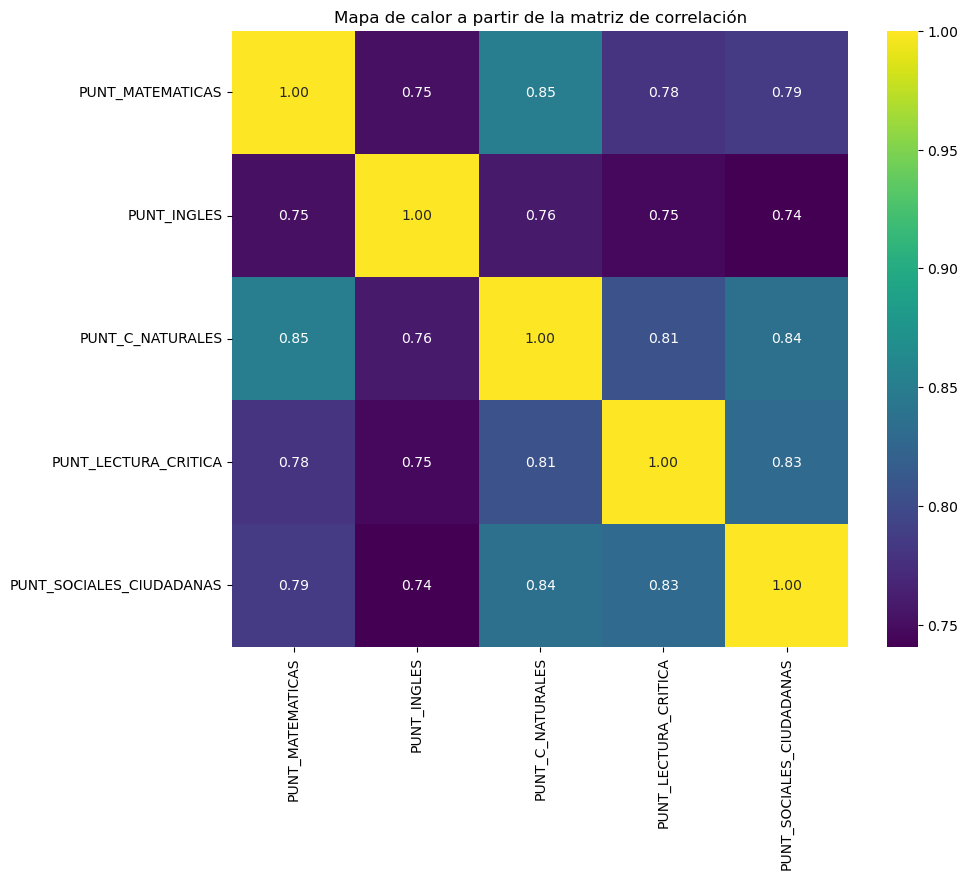

In [50]:
# Seleccionar solo las variables numéricas de interés

variables_numericas = ['PUNT_MATEMATICAS', 'PUNT_INGLES', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS']
df_numericas = df_def_SB11[variables_numericas]

# Calcular la matriz de correlación de Pearson

correlation_matrix = df_numericas.corr()

# Configuración de mapa de calor

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Mapa de calor a partir de la matriz de correlación')
plt.show()

**Interpretación:**

- Todas las combinaciones analizadas en la matriz de correlación de Pearson sugieren una relación positiva entre los puntajes obtenidos en las diferentes áreas evaluadas en la prueba. Es decir, a medida que aumenta el puntaje en alguna de las áreas del conocimiento, el puntaje en las otras también tiende a aumentar. 

- El caso en el que se encontró la correlación más fuerte fue en el par de combinaciones Ciencias Naturales & Matemáticas (0,84), esto sugiere que aquellos estudiantes que obtienen puntajes destacados en Ciencias Naturales tienden a tener puntajes destacados en matemáticas.

- La correlación más débil se encontró entre Inglés y Sociales y Ciudadanas, a pesar de ser una relación positiva fue la más baja entre las combinaciones evaluadas.

### **<span style="color:darkred"> 8. Prueba - Evaluación de un Modelo de Clasificación </span>** 

Llevamos a cabo una prueba de un modelo de clasificación para variables específicas. La idea es poder predecir, si un estudiante dada ciertas características puede sacar un puntaje superior a 250.

In [51]:
variables_modelo = [
    'ESTU_GENERO', 
    'FAMI_ESTRATOVIVIENDA','COLE_BILINGUE',
    'COLE_AREA_UBICACION', 'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
    'PUNT_GLOBAL'
]

df_modelo = df_def_SB11[variables_modelo]

df_modelo.info()

df_modelo.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 77518 entries, 0 to 77608
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ESTU_GENERO               77518 non-null  object 
 1   FAMI_ESTRATOVIVIENDA      77518 non-null  object 
 2   COLE_BILINGUE             77518 non-null  object 
 3   COLE_AREA_UBICACION       77518 non-null  object 
 4   PUNT_LECTURA_CRITICA      77518 non-null  int64  
 5   PUNT_MATEMATICAS          77518 non-null  int64  
 6   PUNT_C_NATURALES          77518 non-null  int64  
 7   PUNT_SOCIALES_CIUDADANAS  77518 non-null  int64  
 8   PUNT_INGLES               77518 non-null  float64
 9   PUNT_GLOBAL               77518 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 6.5+ MB


,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,COLE_BILINGUE,COLE_AREA_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,F,Estrato 4,N,URBANO,50,49,47,40,54.0,235
14062,F,Estrato 6,N,RURAL,70,78,75,74,86.0,376
14061,F,Estrato 6,N,RURAL,71,77,77,100,83.0,407
14060,F,Estrato 6,N,RURAL,70,77,72,67,82.0,362
14059,M,Estrato 5,N,RURAL,75,72,69,67,79.0,357


In [52]:
#Revisamos los únicos en cada variable para entender cuáles serán las transformaciones que realizaremos posteriormente

Unicos_Genero_Modelo = df_modelo['ESTU_GENERO'].unique()
Unicos_Area_Modelo = df_def_SB11['COLE_AREA_UBICACION'].unique()
Unicos_Estratos_Modelo = df_modelo['FAMI_ESTRATOVIVIENDA'].unique()
Unicos_Bilingue_Modelo = df_modelo['COLE_BILINGUE'].unique()



print (Unicos_Genero_Modelo, "\n")
print (Unicos_Area_Modelo, "\n")
print (Unicos_Estratos_Modelo, "\n")
print (Unicos_Bilingue_Modelo, "\n")


['F' 'M'] 

['URBANO' 'RURAL'] 

['Estrato 4' 'Estrato 6' 'Estrato 5' 'Sin Estrato' 'Estrato 2' 'Estrato 3'
 'Estrato 1'] 

['N' 'S'] 



Para efectos de la prueba del modelo, vamos a trabajar con los registros que tienen estrato socioeconómico.

In [53]:
df_modelo_def = df_modelo[df_modelo['FAMI_ESTRATOVIVIENDA'] != 'Sin Estrato']

In [54]:
df_modelo_def.info()
df_modelo_def.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 71711 entries, 0 to 77608
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ESTU_GENERO               71711 non-null  object 
 1   FAMI_ESTRATOVIVIENDA      71711 non-null  object 
 2   COLE_BILINGUE             71711 non-null  object 
 3   COLE_AREA_UBICACION       71711 non-null  object 
 4   PUNT_LECTURA_CRITICA      71711 non-null  int64  
 5   PUNT_MATEMATICAS          71711 non-null  int64  
 6   PUNT_C_NATURALES          71711 non-null  int64  
 7   PUNT_SOCIALES_CIUDADANAS  71711 non-null  int64  
 8   PUNT_INGLES               71711 non-null  float64
 9   PUNT_GLOBAL               71711 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 6.0+ MB


,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,COLE_BILINGUE,COLE_AREA_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,F,Estrato 4,N,URBANO,50,49,47,40,54.0,235
14062,F,Estrato 6,N,RURAL,70,78,75,74,86.0,376
14061,F,Estrato 6,N,RURAL,71,77,77,100,83.0,407
14060,F,Estrato 6,N,RURAL,70,77,72,67,82.0,362
14059,M,Estrato 5,N,RURAL,75,72,69,67,79.0,357


A continuación, procedemos a convertir las variables categóricas a numéricas, debido a que el modelo no soporta información que no esté configurada de forma numérica. Tampoco soporta datos nulos en el conjunto de datos.

In [55]:

genero_numerico = df_modelo_def['ESTU_GENERO'].replace({'M': 0, 'F': 1})
estrato_numerico = df_modelo_def['FAMI_ESTRATOVIVIENDA'].replace({'Estrato 1': 1, 'Estrato 2': 2,'Estrato 3': 3,'Estrato 4': 4, 'Estrato 5': 5,'Estrato 6': 6})
colebilingue_numerico = df_modelo_def['COLE_BILINGUE'].replace({'N': 0, 'S': 1})
ubicacion_numerico = df_modelo_def['COLE_AREA_UBICACION'].replace({'RURAL': 0, 'URBANO': 1})



In [56]:
# Generamos otro data set donde asignamos las nuevas variables resultado de la transformación anterior

df_mdoelo_def_numeric = df_modelo.assign(ESTU_GENERO=genero_numerico, FAMI_ESTRATOVIVIENDA=estrato_numerico, COLE_BILINGUE=colebilingue_numerico,
                                         COLE_AREA_UBICACION=ubicacion_numerico)

In [57]:
df_mdoelo_def_numeric.head(5)

,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,COLE_BILINGUE,COLE_AREA_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,1.0,4.0,0.0,1.0,50,49,47,40,54.0,235
14062,1.0,6.0,0.0,0.0,70,78,75,74,86.0,376
14061,1.0,6.0,0.0,0.0,71,77,77,100,83.0,407
14060,1.0,6.0,0.0,0.0,70,77,72,67,82.0,362
14059,0.0,5.0,0.0,0.0,75,72,69,67,79.0,357


Nos aseguramos nuevamente que no estemos trabajando con información o variables que contengan datos nulos

In [59]:
df_modelo_clasificacion= df_mdoelo_def_numeric.dropna(subset=['FAMI_ESTRATOVIVIENDA'])

df_modelo_clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71711 entries, 0 to 77608
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ESTU_GENERO               71711 non-null  float64
 1   FAMI_ESTRATOVIVIENDA      71711 non-null  float64
 2   COLE_BILINGUE             71711 non-null  float64
 3   COLE_AREA_UBICACION       71711 non-null  float64
 4   PUNT_LECTURA_CRITICA      71711 non-null  int64  
 5   PUNT_MATEMATICAS          71711 non-null  int64  
 6   PUNT_C_NATURALES          71711 non-null  int64  
 7   PUNT_SOCIALES_CIUDADANAS  71711 non-null  int64  
 8   PUNT_INGLES               71711 non-null  float64
 9   PUNT_GLOBAL               71711 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 6.0 MB


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Variables independientes y variable objetivo

X = df_modelo_clasificacion[['ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA', 'COLE_BILINGUE', 'COLE_AREA_UBICACION']]
y = (df_modelo_clasificacion['PUNT_GLOBAL'] > 250).astype(int)  # Variable binaria: 1 si el puntaje global es mayor que 250, 0 en caso contrario

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística

model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones del conjunto de prueba

y_pred = model.predict(X_test)

# Rendimiento del modelo

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Reporte de clasificación

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.80

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.63      0.15      0.24      3026
           1       0.81      0.98      0.89     11317

    accuracy                           0.80     14343
   macro avg       0.72      0.56      0.56     14343
weighted avg       0.77      0.80      0.75     14343



**Interpretación:**

En el contexto del análisis que estamos realizando, buscamos predecir si un estudiante de bachillerato que presente las pruebas saber 11 obtendrá un puntaje global superior a 250. Se toma este mínimo, con el objetivo de analizar el puntaje requerido para ingresar a la Universidad Icesi.

Para esa predicción utilizamos como características el género del estudiante, el estrato de la vivienda del estudiante, si pertenece a un colegio bilingüe y si vive en área rural o urbana. 

**Resultados del modelo**

La precisión del 80% para la clasificación 1, indica que el 80% de las prediciones que realiza el modelo de que un estudiante saque un puntaje superior a 250 son correctas. 


Ahora bien, teniendo en cuenta las transformaciones que se hicieron para evaluar el modelo, las mujeres de estratos socieconómicos altos y que viven en las zonas urbanas, tienden a tener una mayor probabilidad de obtener puntajes por encima de 250. Sin embargo, sería recomendable realizar pruebas con otros conjuntos de información para asegurar este tipo de conclusiones.





### **<span style="color:darkred"> Conclusiones </span>** 

La aplicación del proceso definido para el análisis exploratorio de datos, permitió a lo largo de este trabajo profundizar en las características de los resultados de las pruebas saber 11 diseñadas por el Icfes. EL uso de dichas técnicas permitió abordar la estructura de la información, desde la identificación de las variabes y sus tipos de datos, hasta el uso de gráficos para el análisis de tendencias e incluso revisar alertas acerca de la calidad de la información que se encontró en el Dataset. 

Entre los hallazgos más importantes se destaca que en los últimos cinco años, el número de estudiantes en Colombia que han presentado las pruebas saber 11 diseñadas por el ICFES ha disminuido drasticamente. En 2023, se observó una caída de 39,8% y de 8.381 estudiantes en términos absolutos. Para las Instituciones de Educación Superior, esto supone un reto importante en la estabilidad y permanencia de las mismas, pues estos jóvenes actúan como estudiantes potenciales de las carreras ofrecidas principalmente por universidades privadas, que dada su naturaleza no tienen asegurada la matrícula a sus programas de pregrado. 

Ahora bien, en términos descriptivos, se encontró que el género no actúa de forma determinante en el desempeño de los estudiantes en las pruebas saber 11, dado que la distribución de los puntajes en ambos grupos no evidencia diferencias importantes durante el periodo analizado (2019-2023 Semestre I). Por su parte, entre los principales departamentos del País, el Valle de Cauca es el único que no ha experimentado un impacto importante en el número de estudiantes que han presentado las pruebas saber 11 en los últimos cinco años. Por su parte, departamentos como Santander y Antioquia si han presentado disminuciones en la cantidad de jóvenes que realizan la prueba, pero a su vez, han presentado una evolución positiva en el desempeño global de las pruebas. 

De otro lado, se encontró que tener un buen desempeño en un área puntual de la prueba incide en un buen desempeño en las demás que componen a la misma. Puntualmente, la relación lineal más fuerte se evidenció entre el desempeño en las pruebas de matemáticas y ciencias naturales. Finalmente, a través de la prueba en un modelo de clasificación se encontró que las mujeres que pertenecen a estratos socieconómicos con mejores condiciones y viven en zonas urbanas tienden a obtener puntajes por encima de 250 puntos en las pruebas saber 11. 